In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
from datetime import datetime

# get traffic data for years 2017 - 2020
datafiles = {'2017': "../Resources/2017_traffic_atr_volume.csv",
            '2018': "../Resources/2018_traffic_atr_volume.csv",
            '2019': "../Resources/2019_traffic_atr_volume.csv",
            '2020': "../Resources/2020_traffic_atr_volume.csv"}

# loop to create a dataframe for each year
traffic = {}
for i in datafiles:
    traffic[i] = pd.DataFrame()
    traffic[i] = pd.read_csv(datafiles[i])
    traffic[i] = traffic[i].rename(columns={"station_id": "Station ID", 'dir_of_travel': 'Direction of Travel', 'lane_of_travel': 'Lane of Travel', 'date': 'Date'})

traffic['2020'].head()
print(len(traffic['2017']))
print(len(traffic['2018']))
print(len(traffic['2019']))
print(len(traffic['2020']))

47850
45496
64466
45779


In [2]:
# tally up daily totals for each
condensed = {}
for i in traffic:
    condensed[i] = pd.DataFrame({'Station ID': traffic[i]['Station ID'], 'Date': traffic[i]['Date']})
    condensed[i]['Daily Traffic Volume'] = traffic[i].iloc[:, 4:28].sum(axis=1)

condensed['2020'].head()

,Station ID,Date,Daily Traffic Volume
0,26,2020-01-01,5335
1,26,2020-01-01,1634
2,26,2020-01-01,5953
3,26,2020-01-01,2257
4,26,2020-01-02,6434


In [5]:
# add up all stations for each day
daily_traffic = {}
for i in condensed:
    daily_traffic[i] = pd.DataFrame()
    daily_total = condensed[i].groupby('Date').sum()['Daily Traffic Volume']
    daily_traffic[i] = pd.DataFrame({"Daily Traffic Volume": daily_total})

# 2017-2020 in one dataframe
traf1718 = pd.concat([daily_traffic['2017'], daily_traffic['2018']], axis=0)
traf1920 = pd.concat([daily_traffic['2019'], daily_traffic['2020']], axis=0)
daily_traffic['All'] = pd.concat([traf1718, traf1920], axis=0)

daily_traffic['2019'].head()

,Daily Traffic Volume
Date,
2019-01-01,547690
2019-01-02,835654
2019-01-03,877877
2019-01-04,972684
2019-01-05,774054


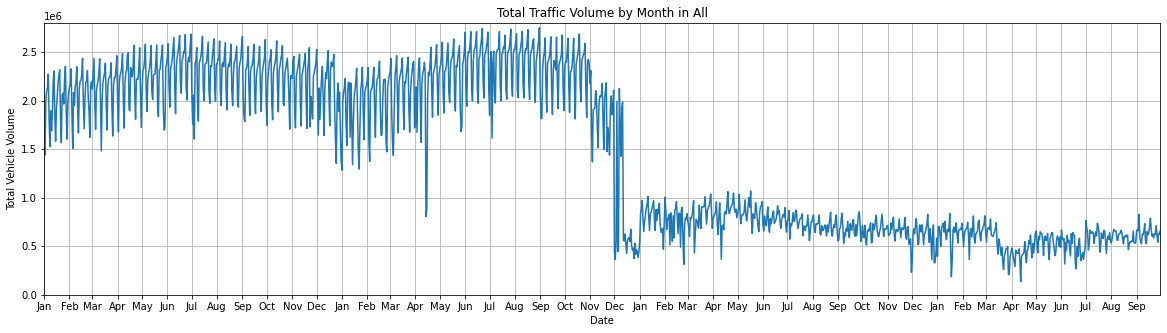

In [7]:

# Select year for graph, or 'All' for every year
year_select = 'All'

x = daily_traffic[year_select].index
y = daily_traffic[year_select]['Daily Traffic Volume']

# graph date ticks
plt.figure(figsize=(20,5))
ax = plt.gca()
dates = daily_traffic[year_select].index
dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]
plt.plot(dates, y)
ax.set_xlim([dates[0], dates[-1]])

ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(plt.NullFormatter())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# graph formatting

plt.title(f'Total Traffic Volume by Month in {year_select}')
ax.grid(axis='both')
#plt.xlim(0,30)
plt.ylim(0,2800000)
plt.xticks(rotation=0)
plt.xlabel('Date')
plt.ylabel('Total Vehicle Volume')

plt.show()
